#### Disclaimer:
This notebook is based on notebooks by by Alex Gramfort and Andreas Mueller (Two of the creators/maintainers of scikit-learn). Their entire repository can be found [on GitHub](https://github.com/amueller/scipy-2017-sklearn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A few words on sklearn "toy" datasets:

- load_*
- fetch_*
- make_*

# Supervised learning 1: Classification example

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(centers=2, random_state=0)

In [4]:
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (100, 2)
y shape: (100,)


In [5]:
# Exercise: plot the data

In [9]:
# %load snippets/plot_blobs.py

In [10]:
np.bincount(y)

array([50, 50], dtype=int64)

#### Reminder: Train-Test-Split

<img src="sklearn/figures/train_test_split_matrix.svg" width="100%">

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

#### The scikit-learn estimator API

<img src="sklearn/figures/supervised_workflow.svg" width="100%">

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. (All models in scikit-learn have a very consistent interface). For instance, we first import the logistic regression class.

In [12]:
from sklearn.linear_model import LogisticRegression

Next, we instantiate the estimator object.

In [13]:
classifier = LogisticRegression()

In [14]:
X_train.shape

(75, 2)

In [15]:
y_train.shape

(75,)

To build the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [16]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [19]:
y_pred = classifier.predict(X_test)

We can compare these against the true labels:

In [20]:
print(y_pred)
print(y_test)

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [21]:
np.mean(prediction == y_test)

0.84

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [22]:
classifier.score(X_test, y_test)

0.84

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [23]:
classifier.score(X_train, y_train)

0.9466666666666667

Logistic regression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

In [24]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if hasattr(classifier, "decision_function"):
        Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
        levels = [0]
        fill_levels = [Z.min(), 0, Z.max()]
    else:
        Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax = plt.gca()
    if fill:
        ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8, levels=fill_levels)
    else:
        ax.contour(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8, levels=levels)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

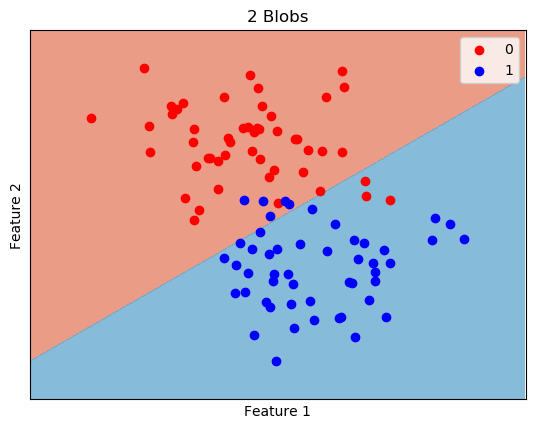

In [25]:
plt.style.use('default')
fig, ax = plt.subplots()
plot_2d_separator(classifier, X, fill=True)
ax.scatter(X[y==0,0], X[y==0,1], c='r', label='0')
ax.scatter(X[y==1,0], X[y==1,1], c='b', label='1')
ax.set(xlabel='Feature 1', 
       ylabel='Feature 2', 
       title='2 Blobs')
ax.legend()


**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [26]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.38092515 -1.49993172]]
[1.54995538]


Another classifier: K Nearest Neighbors
------------------------------------------------
Another popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The interface is exactly the same as for ``LogisticRegression above``.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

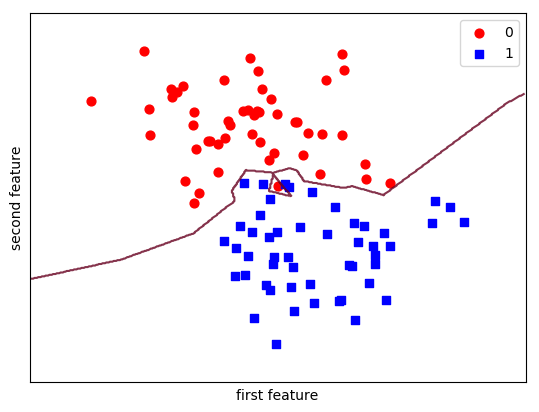

In [30]:
plot_2d_separator(knn, X)
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='r', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='b', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plt.legend(loc='upper right');

In [31]:
knn.score(X_test, y_test)

1.0

#### Question:
What's the story with that little "island"? 
How can we correct this?

#### EXERCISE:

- Apply the KNeighborsClassifier to the `iris` dataset. Play with different values of the `n_neighbors` and observe how training and test score change.

In [32]:
# %load sklearn/solutions/05A_knn_with_diff_k.py

#### 3rd classifier example: Support Vectore Machine (SVM)

In [33]:
from sklearn.svm import SVC

In [38]:
classifier = SVC(kernel='linear')

In [39]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

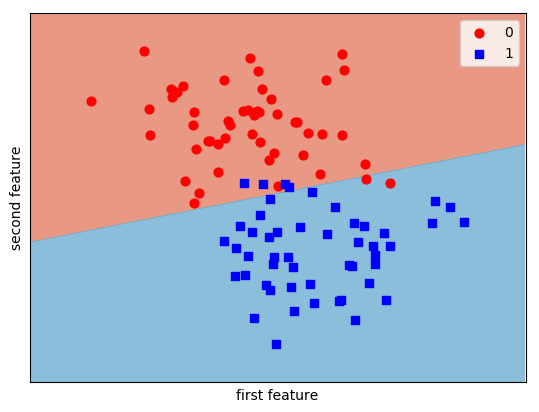

In [40]:
plot_2d_separator(classifier, X, fill=True)
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='r', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='b', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")

plt.legend(loc='upper right');

Check out [scikit-learn's documentation](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py) for examples and comparisons

# Supervised learning 2: Regression example

In [41]:
# Creating some toy data:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

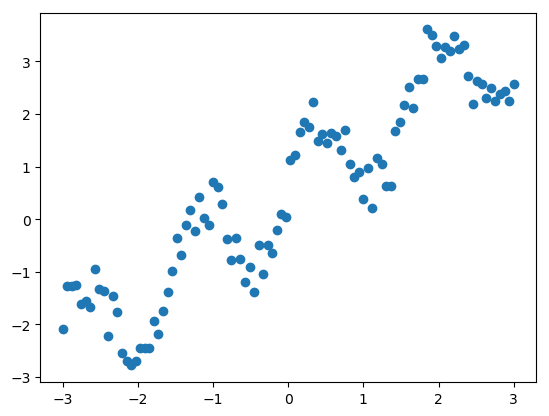

In [42]:
plt.plot(x, y, 'o');

### 1. Linear regression:

One of the simplest models again is a linear one, that simply tries to predict the data as lying on a line. One way to find such a line is `LinearRegression` (also known as [*Ordinary Least Squares (OLS)*](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression).
The interface for LinearRegression is exactly the same as for the classifiers before, only that ``y`` now contains float values, instead of classes.

As we remember, the scikit-learn API requires us to provide the target variable (`y`) as a 1-dimensional array; scikit-learn's API expects the samples (`X`) in form a 2-dimensional array -- even though it may only consist of 1 feature. Thus, let us convert the 1-dimensional `x` NumPy array into an `X` array with 2 axes:


In [43]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


Again, we start by splitting our dataset into a training (75%) and a test set (25%):

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we use the learning algorithm implemented in `LinearRegression` to **fit a regression model to the training data**:

In [45]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

After fitting to the training data, we paramerterized a linear regression model with the following values.

In [46]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [0.90211711]
y-axis intercept:  0.44840974988268


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = weight \times x + \text{intercept}$$.

Plugging in the min and max values into thos equation, we can plot the regression fit to our training data:

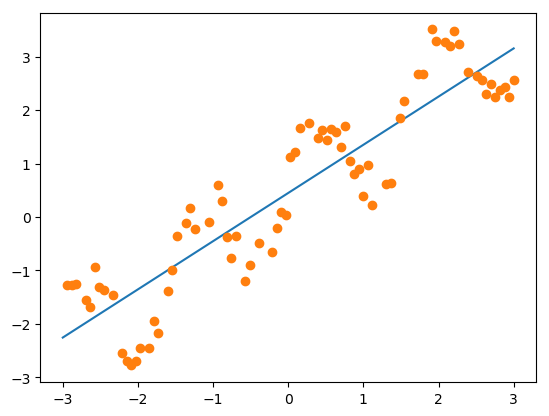

In [47]:
min_y_predicted = X.min() * regressor.coef_[0] + regressor.intercept_
max_y_predicted = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_y_predicted, max_y_predicted])
plt.plot(X_train, y_train, 'o');

Similar to the estimators for classification in the previous notebook, we use the `predict` method to predict the target variable. And we expect these predicted values to fall onto the line that we plotted previously:

In [48]:
y_pred_train = regressor.predict(X_train)

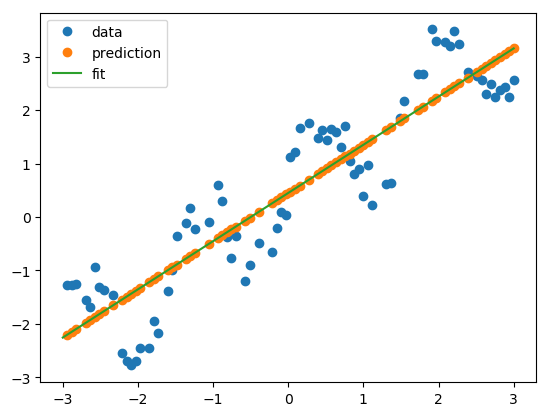

In [49]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_y_predicted, max_y_predicted], label='fit')
plt.legend(loc='best')

As we can see in the plot above, the line is able to capture the general slope of the data, but not many details.

Next, let's try the test set:

In [50]:
y_pred_test = regressor.predict(X_test)

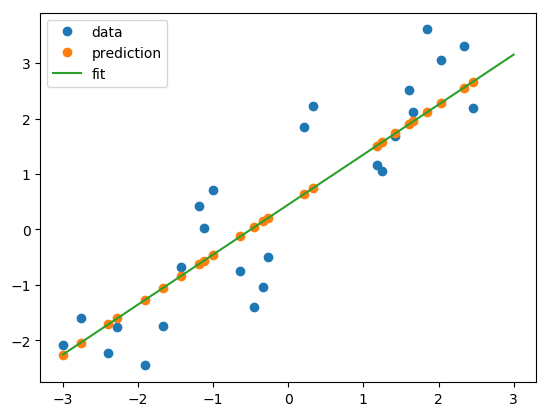

In [51]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_y_predicted, max_y_predicted], label='fit')
plt.legend(loc='best');

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [52]:
regressor.score(X_test, y_test)

0.7994321405079685

### 2. KNeighborsRegression
As for classification, we can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

In [53]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

Again, let us look at the behavior on training and test set:

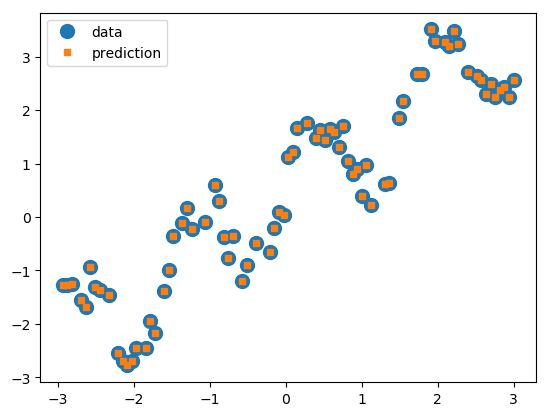

In [54]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the training set, we do a perfect job: each point is its own nearest neighbor!

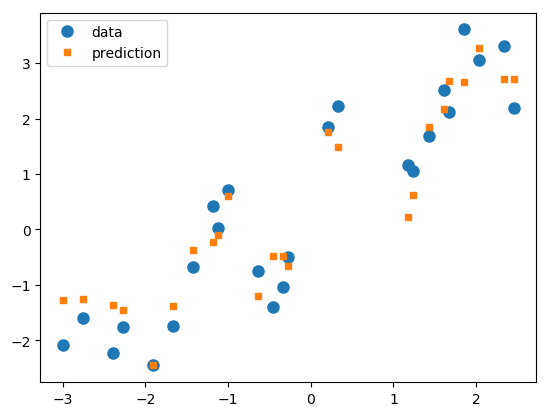

In [55]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the test set, we also do a better job of capturing the variation, but our estimates look much messier than before.
Let us look at the R<sup>2</sup> score:

In [56]:
kneighbor_regression.score(X_test, y_test)

0.9166293022467948

Much better than before (using only X)! Here, the linear model was not a good fit for our problem; it was lacking in complexity and thus under-fit our data.

#### EXERCISE:
- Add a feature containing  sin(4x) to X and redo the fit. Visualize the predictions with this new richer, yet linear, model.

(Below is an example of how to add a feature column)

In [57]:
# Adding a feature column to a numpy column array:
arr = np.array([[1], [2], [3], [4]])
print('arr: \n', arr, end='\n\n')

arr_2 = arr+10
print('arr_2: \n', arr_2)

np.concatenate((arr, arr_2), axis=1)

arr: 
 [[1]
 [2]
 [3]
 [4]]

arr_2: 
 [[11]
 [12]
 [13]
 [14]]


array([[ 1, 11],
       [ 2, 12],
       [ 3, 13],
       [ 4, 14]])

In [58]:
# %load sklearn/solutions/06B_lin_with_sine.py

#### EXERCISE:
- Compare the KNeighborsRegressor and LinearRegression on the boston housing dataset. You can load the dataset using sklearn.datasets.load_boston. You can learn about the dataset by reading the DESCR attribute.

In [59]:
# %load sklearn/solutions/06A_knn_vs_linreg.py

# Basics of feature engineering 

#### Feature scaling 

Many instances of unsupervised learning, such as dimensionality reduction, manifold learning, and feature extraction, find a new representation of the input data without any additional input. (In contrast to supervised learning, usnupervised algorithms don't require or consider target variables like in the previous classification and regression examples). 

<img src="sklearn/figures/unsupervised_workflow.svg" width="100%">

A very basic example is the rescaling of our data, which is a requirement for many machine learning algorithms as they are not scale-invariant -- rescaling falls into the category of data pre-processing and can barely be called *learning*. There exist many different rescaling technques, and in the following example, we will take a look at a particular method that is commonly called "standardization." Here, we will recale the data so that each feature is centered at zero (mean = 0) with unit variance (standard deviation = 0).

For example, if we have a 1D dataset with the values [1, 2, 3, 4, 5], the standardized values are

- 1 -> -1.41
- 2 -> -0.71
- 3 -> 0.0
- 4 -> 0.71
- 5 -> 1.41

computed via the equation $x_{standardized} = \frac{x - \mu_x}{\sigma_x}$,
where $\mu$ is the sample mean, and $\sigma$ the standard deviation, respectively.






In [60]:
ary = np.array([1, 2, 3, 4, 5])
ary_standardized = (ary - ary.mean()) / ary.std()
ary_standardized

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

Although standardization is a most basic preprocessing procedure -- as we've seen in the code snipped above -- scikit-learn implements a `StandardScaler` class for this computation. And in later sections, we will see why and when the scikit-learn interface comes in handy over the code snippet we executed above.  

Applying such a preprocessing has a very similar interface to the supervised learning algorithms we saw so far.
To get some more practice with scikit-learn's "Transformer" interface, let's start by loading the iris dataset and rescale it:


In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape)

(112, 4)


The iris dataset is not "centered" that is it has non-zero mean and the standard deviation is different for each component:


In [62]:
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean : [5.88660714 3.05178571 3.79642857 1.22232143] 
standard deviation : [0.86741565 0.43424445 1.79264014 0.77916047] 


To use a preprocessing method, we first import the estimator, here StandardScaler and instantiate it:
    

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

As with the classification and regression algorithms, we call ``fit`` to learn the model from the data. As this is an unsupervised model, we only pass ``X``, not ``y``. This simply estimates mean and standard deviation.

In [64]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we can rescale our data by applying the ``transform`` (not ``predict``) method:

In [65]:
X_train_scaled = scaler.transform(X_train)

``X_train_scaled`` has the same number of samples and features, but the mean was subtracted and all features were scaled to have unit standard deviation:

In [66]:
print(X_train_scaled.shape)

(112, 4)


In [67]:
print("mean : %s " % X_train_scaled.mean(axis=0))
print("standard deviation : %s " % X_train_scaled.std(axis=0))

mean : [ 1.21331516e-15 -4.41115398e-17  7.13714802e-17  2.57730345e-17] 
standard deviation : [1. 1. 1. 1.] 


To summarize: Via the `fit` method, the estimator is fitted to the data we provide. In this step, the estimator estimates the parameters from the data (here: mean and standard deviation). Then, if we `transform` data, these parameters are used to transform a dataset. (Please note that the transform method does not update these parameters).

It's important to note that the same transformation is applied to the training and the test set. That has the consequence that usually the mean of the test data is not zero after scaling:

In [68]:
X_test_scaled = scaler.transform(X_test)
print("mean test data: %s" % X_test_scaled.mean(axis=0))

mean test data: [-0.19692712  0.0201283  -0.08315118 -0.11983932]


It is important for the training and test data to be transformed in exactly the same way, for the following processing steps to make sense of the data, as is illustrated in the figure below:

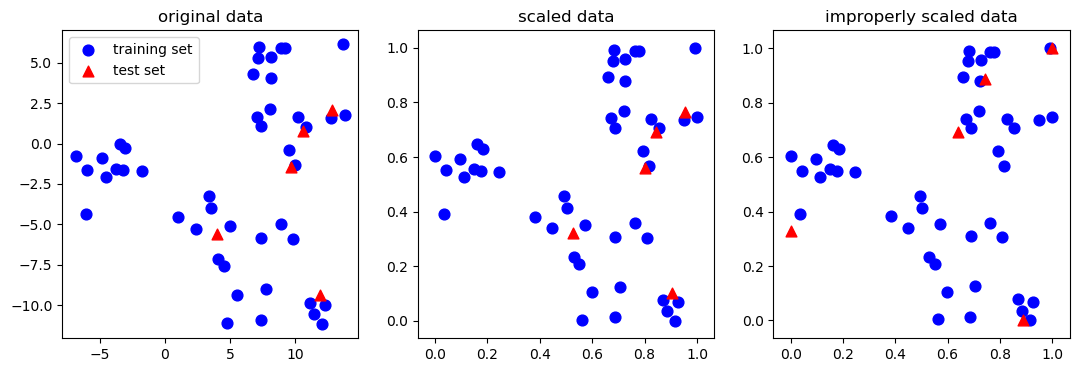

In [69]:
from figures import plot_relative_scaling
plot_relative_scaling()

There are several common ways to scale the data. The most common one is the ``StandardScaler`` we just introduced, but rescaling the data to a fix minimum an maximum value with ``MinMaxScaler`` (usually between 0 and 1), or using more robust statistics like median and quantile, instead of mean and standard deviation (with ``RobustScaler``), are also useful.

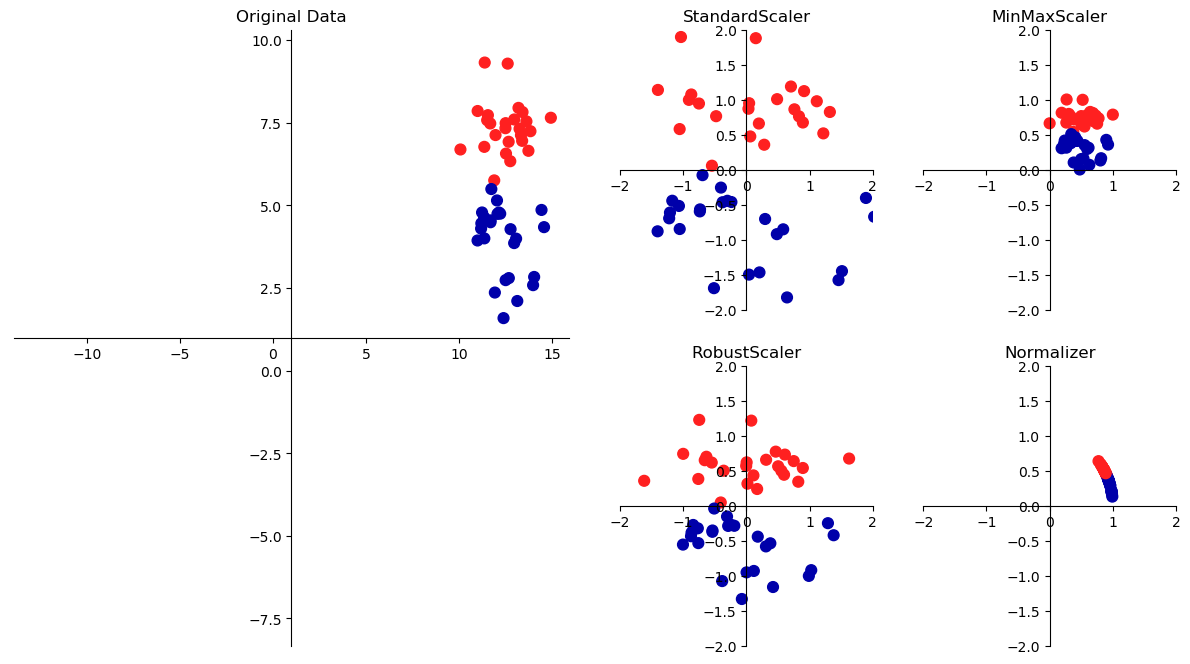

In [70]:
from figures import plot_scaling
plot_scaling()

# Dealing with categorical features 

As an example of how to work with both categorical and numerical data, we will perform survival predicition for the passengers of the HMS Titanic.

We will use a version of the Titanic (titanic3.xls) from [here](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls). We converted the .xls to .csv for easier manipulation but left the data is otherwise unchanged.

We need to read in all the lines from the (titanic3.csv) file, set aside the keys from the first line, and find our labels (who survived or died) and data (attributes of that person). Let's look at the keys and some corresponding example lines.

In [71]:
import os
import pandas as pd

titanic = pd.read_csv('data/titanic3.csv')
print(titanic.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


Here is a broad description of the keys and what they mean:

```
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination
```

In general, it looks like `name`, `sex`, `cabin`, `embarked`, `boat`, `body`, and `homedest` may be candidates for categorical features, while the rest appear to be numerical features. We can also look at the first couple of rows in the dataset to get a better understanding:

In [72]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


We clearly want to discard the "boat" and "body" columns for any classification into survived vs not survived as they already contain this information. The name is unique to each person (probably) and also non-informative. For a first try, we will use "pclass", "sibsp", "parch", "fare" and "embarked" as our features:

In [73]:
labels = titanic.survived.values
features = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

In [74]:
features.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S


The data now contains only useful features, but they are not in a format that the machine learning algorithms can understand. We need to transform the strings "male" and "female" into binary variables that indicate the gender, and similarly for "embarked".
We can do that using the pandas ``get_dummies`` function:

In [75]:
pd.get_dummies(features).head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,0,0,0,1
1,1,0.9167,1,2,151.5500,0,1,0,0,1
2,1,2.0000,1,2,151.5500,1,0,0,0,1
3,1,30.0000,1,2,151.5500,0,1,0,0,1
4,1,25.0000,1,2,151.5500,1,0,0,0,1


This transformation successfully encoded the string columns. However, one might argue that the class is also a categorical variable. We can explicitly list the columns to encode using the ``columns`` parameter, and include ``pclass``:

In [76]:
features_dummies = pd.get_dummies(features, columns=['pclass', 'sex', 'embarked'])
features_dummies.head(n=16)

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,29.0000,0,0,211.3375,1,0,0,1,0,0,0,1
1,0.9167,1,2,151.5500,1,0,0,0,1,0,0,1
2,2.0000,1,2,151.5500,1,0,0,1,0,0,0,1
3,30.0000,1,2,151.5500,1,0,0,0,1,0,0,1
4,25.0000,1,2,151.5500,1,0,0,1,0,0,0,1
5,48.0000,0,0,26.5500,1,0,0,0,1,0,0,1
6,63.0000,1,0,77.9583,1,0,0,1,0,0,0,1
7,39.0000,0,0,0.0000,1,0,0,0,1,0,0,1
8,53.0000,2,0,51.4792,1,0,0,1,0,0,0,1
9,71.0000,0,0,49.5042,1,0,0,0,1,1,0,0


In [77]:
data = features_dummies.values

In [78]:
np.isnan(data).any()

True

With all of the hard data loading work out of the way, evaluating a classifier on this data becomes straightforward. Setting up the simplest possible model, we want to see what the simplest score can be with `DummyClassifier`.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, random_state=0)

imp = Imputer()
imp.fit(train_data)
train_data_finite = imp.transform(train_data)
test_data_finite = imp.transform(test_data)

In [80]:
np.isnan(train_data_finite).any()

False

In [81]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier('most_frequent')
clf.fit(train_data_finite, train_labels)
print("Prediction accuracy: %f"
      % clf.score(test_data_finite, test_labels))

Prediction accuracy: 0.634146


In [82]:
np.isnan(test_labels).any()

False

#### EXERCISE:
- Try executing the above classification, using LogisticRegression and RandomForestClassifier instead of DummyClassifier
- Does selecting a different subset of features help?

In [83]:
# %load sklearn/solutions/10_titanic.py

# Cross validation

In the previous sections and notebooks, we split our dataset into two parts, a training set and a test set. We used the training set to fit our model, and we used the test set to evaluate its generalization performance -- how well it performs on new, unseen data.


<img src="sklearn/figures/train_test_split.svg" width="100%">


However, often (labeled) data is precious, and this approach lets us only use ~ 3/4 of our data for training. On the other hand, we will only ever try to apply our model 1/4 of our data for testing.
A common way to use more of the data to build a model, but also get a more robust estimate of the generalization performance, is cross-validation.
In cross-validation, the data is split repeatedly into a training and non-overlapping test-sets, with a separate model built for every pair. The test-set scores are then aggregated for a more robust estimate.

The most common way to do cross-validation is k-fold cross-validation, in which the data is first split into k (often 5 or 10) equal-sized folds, and then for each iteration, one of the k folds is used as test data, and the rest as training data:

<img src="sklearn/figures/cross_validation.svg" width="100%">


This way, each data point will be in the test-set exactly once, and we can use all but a k'th of the data for training.
Let us apply this technique to evaluate the KNeighborsClassifier algorithm on the Iris dataset:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

The labels in iris are sorted, which means that if we split the data as illustrated above, the first fold will only have the label 0 in it, while the last one will only have the label 2:

In [ ]:
y

To avoid this problem in evaluation, we first shuffle our data:

In [ ]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

Now implementing cross-validation is easy (and gets even easier further down):

In [ ]:
k = 5
n_samples = len(X)
fold_size = n_samples // k
scores = []
masks = []
for fold in range(k):
    # generate a boolean mask for the test set in this fold
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size : (fold + 1) * fold_size] = True
    # store the mask for visualization
    masks.append(test_mask)
    # create training and test sets using this mask
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]
    # fit the classifier
    classifier.fit(X_train, y_train)
    # compute the score and record it
    scores.append(classifier.score(X_test, y_test))

Let's check that our test mask does the right thing:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(masks, cmap='gray_r')

And now let's look a the scores we computed:

In [ ]:
print(scores)
print(np.mean(scores))

As you can see, there is a rather wide spectrum of scores from 90% correct to 100% correct. If we only did a single split, we might have gotten either answer.

As cross-validation is such a common pattern in machine learning, there are functions to do the above for you with much more flexibility and less code.
The ``sklearn.model_selection`` module has all functions related to cross validation. There easiest function is ``cross_val_score`` which takes an estimator and a dataset, and will do all of the splitting for you:

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))

As you can see, the function uses three folds by default. You can change the number of folds using the cv argument:

In [ ]:
cross_val_score(classifier, X, y, cv=5)

There are also helper objects in the cross-validation module that will generate indices for you for all kinds of different cross-validation methods, including k-fold:

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

By default, cross_val_score will use ``StratifiedKFold`` for classification, which ensures that the class proportions in the dataset are reflected in each fold. If you have a binary classification dataset with 90% of data point belonging to class 0, that would mean that in each fold, 90% of datapoints would belong to class 0.
If you would just use KFold cross-validation, it is likely that you would generate a split that only contains class 0.
It is generally a good idea to use ``StratifiedKFold`` whenever you do classification.

``StratifiedKFold`` would also remove our need to shuffle ``iris``.
Let's see what kinds of folds it generates on the unshuffled iris dataset.
Each cross-validation class is a generator of sets of training and test indices:

In [ ]:
cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(iris.data, iris.target):
    print(test)

As you can see, there are a couple of samples from the beginning, then from the middle, and then from the end, in each of the folds.
This way, the class ratios are preserved. Let's visualize the split:

In [ ]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')

In [ ]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

For comparison, again the standard KFold, that ignores the labels:

In [ ]:
plot_cv(KFold(n_splits=5), iris.data, iris.target)

Keep in mind that increasing the number of folds will give you a larger training dataset, but will lead to more repetitions, and therefore a slower evaluation:

In [ ]:
plot_cv(KFold(n_splits=10), iris.data, iris.target)

Another helpful cross-validation generator is ``ShuffleSplit``. This generator simply splits of a random portion of the data repeatedly. This allows the user to specify the number of repetitions and the training set size independently:

In [ ]:
plot_cv(ShuffleSplit(n_splits=5, test_size=.2), iris.data, iris.target)

If you want a more robust estimate, you can just increase the number of splits:

In [ ]:
plot_cv(ShuffleSplit(n_splits=20, test_size=.2), iris.data, iris.target)

You can use all of these cross-validation generators with the `cross_val_score` method:

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=.2)
cross_val_score(classifier, X, y, cv=cv)

#### EXERCISE:
- Perform three-fold cross-validation using the KFold class on the iris dataset without shuffling the data. Can you explain the result?

In [ ]:
# %load sklearn/solutions/13_cross_validation.py

# Classification metrics beyong accuracy

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.5)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

Another useful function is the ``classification_report`` which provides precision, recall, fscore and support for all classes.
Precision is how many of the predictions for a class are actually that class. With TP, FP, TN, FN standing for "true positive", "false positive", "true negative" and "false negative" repectively:

Precision = TP / (TP + FP)

Recall is how many of the true positives were recovered:

Recall = TP / (TP + FN)

F1-score is the geometric average of precision and recall:

F1 = 2 x (precision x recall) / (precision + recall)

#### The ROC curve and confusion matrix

In [ ]:
def plot_roc(y, scores):
    fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)
    roc_auc = auc(fpr, tpr)
    fig = plt.figure(figsize=[7,7])
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='50% random guess')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Radical alpha ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.style.use('classic')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
plot_roc(y_test, clf.predict_proba(X_test)[:,1])

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
class_names = ['Negative', 'Positive']
# Plot non-normalized confusion matrix
plt.rc('font', size=12)  
fig = plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

In [ ]:
class_names = ['Negative', 'Positive']
# Plot non-normalized confusion matrix
plt.rc('font', size=12)  
fig = plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Confusion matrix. Normalized')